In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [ ]:
prices_df =  pd.read_csv('prices.csv', header=0)
prices_df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [ ]:
yahoo = prices_df[prices_df['symbol']=='YHOO']
yahoo_stk_prices = yahoo.close.values.astype('float32')
yahoo_stk_prices = yahoo_stk_prices.reshape(1762, 1)
yahoo_stk_prices.shape

(1762, 1)

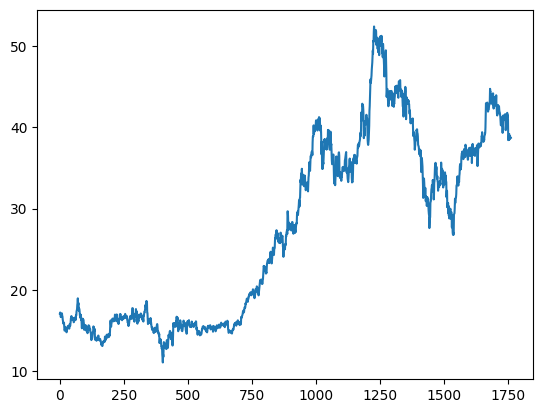

In [ ]:
plt.plot(yahoo_stk_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stk_prices = scaler.fit_transform(yahoo_stk_prices)

In [ ]:
train_size = int(len(yahoo_stk_prices) * 0.80)
test_size = len(yahoo_stk_prices) - train_size
train, test = yahoo_stk_prices[0:train_size,:], yahoo_stk_prices[train_size:len(yahoo_stk_prices),:]
print(len(train), len(test))

1409 353


The purpose of this function is to prepare a time series dataset for supervised learning. By creating input-output pairs, it allows you to train machine learning models (e.g., neural networks, regression models) to make predictions based on historical data, where each input consists of a sequence of past values and the output is the next value in the sequence. This is a common approach in time series forecasting and sequence prediction tasks.

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    print(len(dataset))
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
len(train) - 2

1407

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1409
353


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(units = 50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    units = 100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.027616262435913086


In [ ]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=10,
    validation_split=0.05)

Epoch 1/10
11/11 [==============================] - 6s 100ms/step - loss: 0.1401 - val_loss: 0.3451
Epoch 2/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0901 - val_loss: 0.2191
Epoch 3/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0593 - val_loss: 0.1286
Epoch 4/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0454 - val_loss: 0.0868
Epoch 5/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0381 - val_loss: 0.0620
Epoch 6/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0295 - val_loss: 0.0524
Epoch 7/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0207 - val_loss: 0.0267
Epoch 8/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0127 - val_loss: 0.0133
Epoch 9/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 10/10
11/11 [==============================] - 0s 12ms/step - loss: 0.0034 - val_loss: 0.0038


1/1 [==============================] - 1s 833ms/step
[[0.579899]]
1/1 [==============================] - 1s 1s/step
[[1.3517473]]
1/1 [==============================] - 0s 24ms/step
[[2.782412]]
1/1 [==============================] - 0s 24ms/step
[[4.9942136]]
1/1 [==============================] - 0s 24ms/step
[[7.16248]]
1/1 [==============================] - 0s 23ms/step
[[ 35.02823]
 [ 66.89013]
 [125.94797]
 [217.25113]
 [306.75717]]


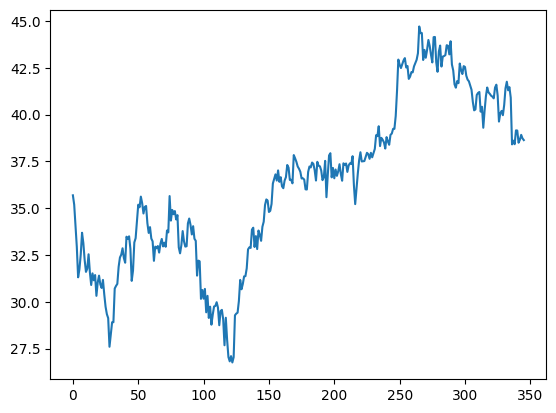

In [ ]:
def plt_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

#predict length consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue

    for i in range(length):
        predicted = []

        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])

        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)

        prediction_seqs.append(predicted[-1])

    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plt_results_multiple(predictions, testY, predict_length)